In [1]:
%matplotlib inline
import seaborn as sns # Seaborn 로딩하기
import matplotlib.pyplot as plt # Matplotlib의 pyplot 로딩하기
import pandas as pd

## Load Dataset

In [2]:
train = pd.read_csv("data/train.csv", index_col="PassengerId")

print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Seaborn vs Matplotlib

<strong>목표:</strong> Seaborn과 Matplotlib의 Syntax 차이를 알아보고 효과적인 데이터 탐색을 해보자

_Titanic raw data의 탐색과 전처리가 함게 되어야 하나, 시각화 라이브러리의 사용법을 알아보기 위해 전처리 과정은 생략_

------------------------------------------------------

### Matplotlib

#### Question: 어느 지역에서 가장 많이 Emabarked 했는가?

(방법1)

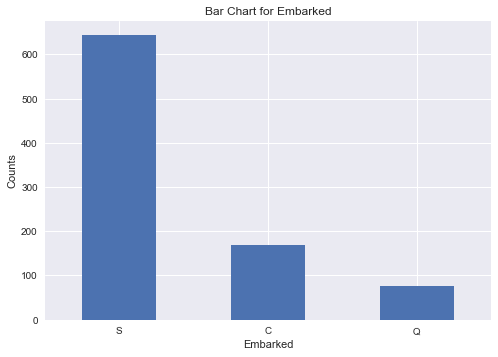

In [18]:
train.Embarked.value_counts().plot(kind='bar',
                                  title='Bar Chart for Embarked',
                                  rot=1)

plt.xlabel('Embarked')
plt.ylabel('Counts');

(방법2)

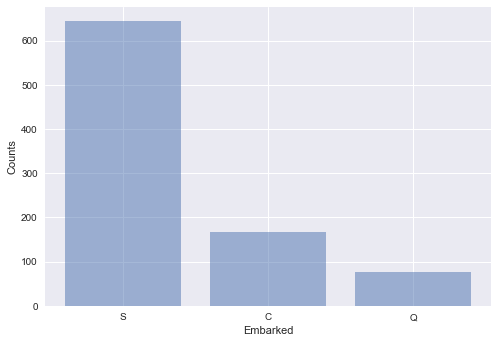

In [19]:
plt.bar(train.Embarked.value_counts().index, train.Embarked.value_counts(), alpha=.5, align='center')
plt.xlabel('Embarked')
plt.ylabel('Counts')

plt.show()

#### Question: Pclass에 따라 생존자의 수가 다른가?

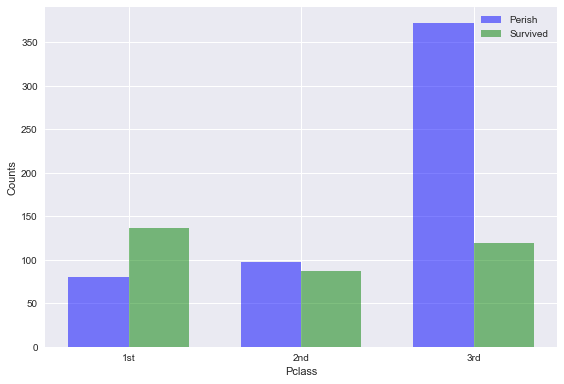

In [20]:
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.5
 
rects1 = plt.bar(train[train.Survived == 0].Pclass.value_counts().index, train[train.Survived == 0].Pclass.value_counts(), 
                 bar_width,
                 alpha=opacity,
                 color='b',
                 label='Perish')

rects2 = plt.bar(bar_width + train[train.Survived == 1].Pclass.value_counts().index, train[train.Survived == 1].Pclass.value_counts(), 
                 bar_width,
                 alpha=opacity,
                 color='g',
                 label='Survived')

plt.xlabel('Pclass')
plt.ylabel('Counts')
plt.xticks(train[train.Survived == 0].Pclass.value_counts().index + bar_width/2, ('3rd', '2nd', '1st'))
plt.legend()
 
plt.tight_layout()
plt.show()

데이터 탐색을 위해서 반드시 그래프를 그릴 필요는 없다

In [32]:
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


#### Question: Titanic호에 승선한 사람들의 연령대는 어떻게 될까?

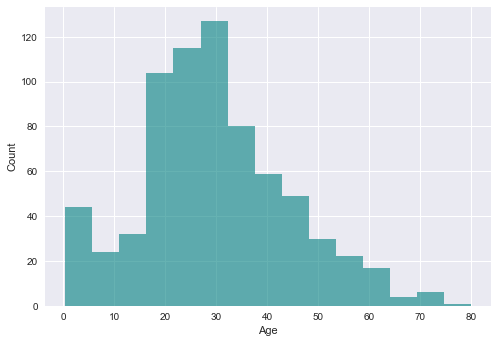

In [21]:
ax = train["Age"].hist(bins=15, color='teal', alpha=0.6)
ax.set(xlabel='Age', ylabel='Count')
plt.show()

#### Question: Titanic호의 요금은 얼마일까?

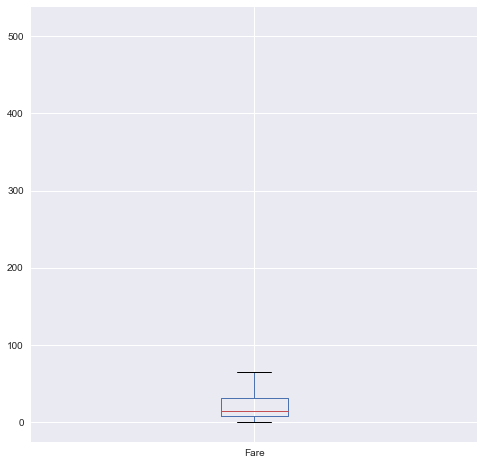

In [30]:
train.Fare.plot(kind='box',figsize=(8,8))

#### Titanic호의 생존자들 중 남녀(성별) 생존 비율이 다를까?

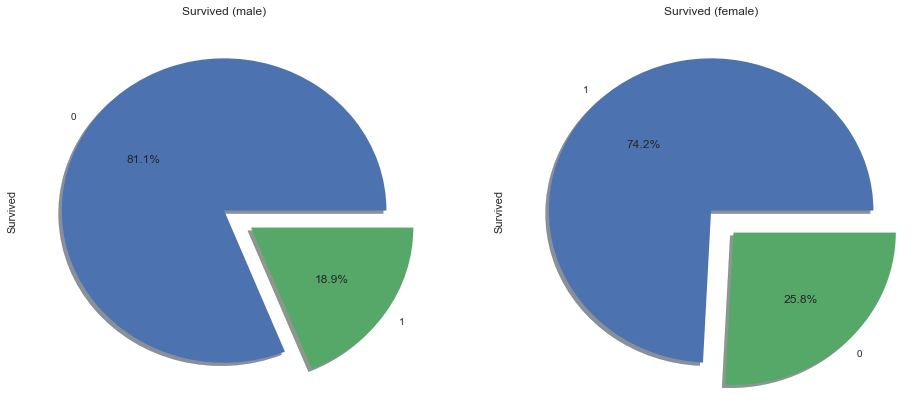

In [31]:
f,ax=plt.subplots(1,2,figsize=(16,7))
train['Survived'][train['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
train['Survived'][train['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

----------------------------------------------------

## Seaborn

Seaborn API를 사용하면 (Matplotlib보다) 좀 더 간단한 syntax로 데이터 탐사가 가능

### 1. countplot

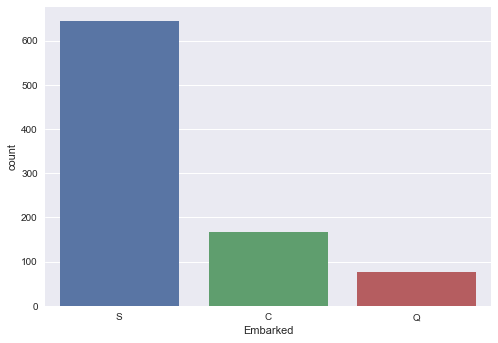

In [3]:
sns.countplot(data=train, x="Embarked")

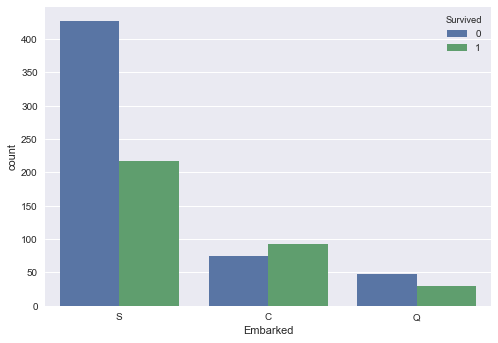

In [4]:
sns.countplot(data=train, x="Embarked", hue="Survived")

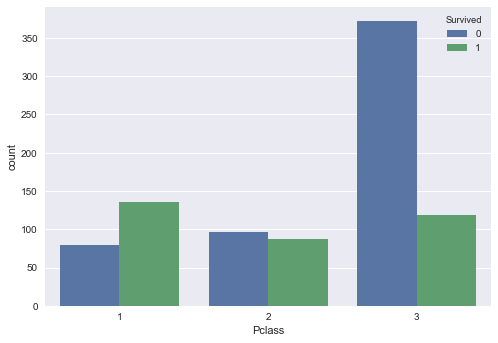

In [5]:
sns.countplot(data=train, x="Pclass", hue="Survived")

### 2. Barplot

C:\Users\Chris\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


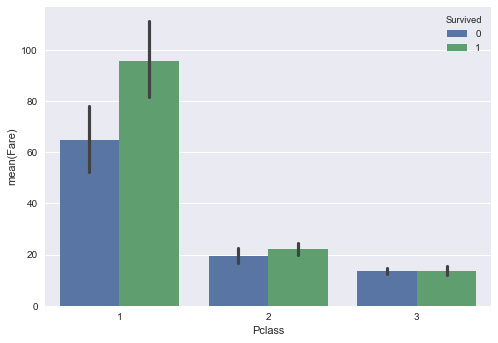

In [6]:
sns.barplot(data=train, x="Pclass", y="Fare", hue="Survived")

### 3. distplot

C:\Users\Chris\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


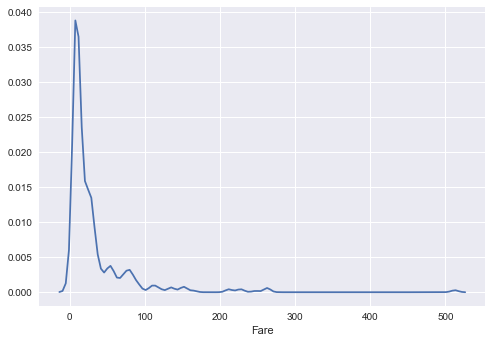

In [7]:
sns.distplot(train["Fare"], hist=False)

C:\Users\Chris\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


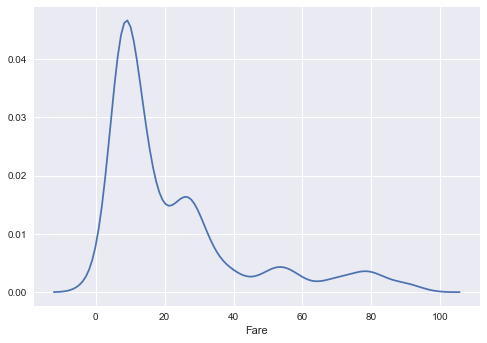

In [8]:
ignore_high_fare = train[train["Fare"] < 100]

sns.distplot(ignore_high_fare["Fare"], hist=False)

C:\Users\Chris\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


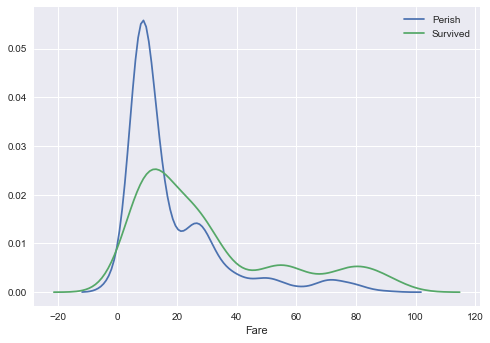

In [9]:
ignore_high_fare = train[train["Fare"] < 100]

perish = ignore_high_fare[ignore_high_fare['Survived'] == 0]
survived = ignore_high_fare[ignore_high_fare["Survived"] == 1]

sns.distplot(perish["Fare"], hist=False, label="Perish")
sns.distplot(survived["Fare"], hist=False, label="Survived")

### 4. lmplot

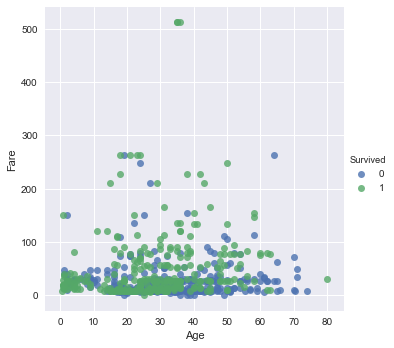

In [10]:
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)

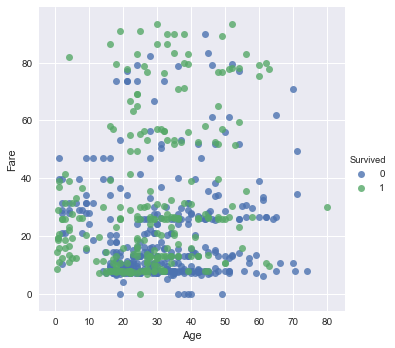

In [11]:
ignore_high_fare = train[train["Fare"] < 100]

sns.lmplot(data=ignore_high_fare, x="Age", y="Fare", \
           hue="Survived", fit_reg=False)

### 5. subplots

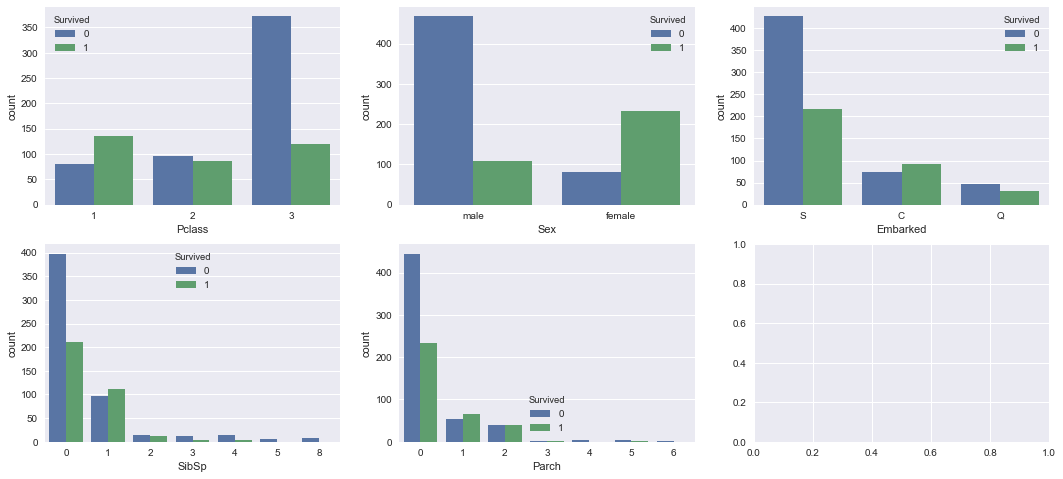

In [12]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = \
    plt.subplots(nrows=2, ncols=3)

figure.set_size_inches(18, 8)

sns.countplot(data=train, x="Pclass", hue="Survived", ax=ax1)
sns.countplot(data=train, x="Sex", hue="Survived", ax=ax2)
sns.countplot(data=train, x="Embarked", hue="Survived", ax=ax3)
sns.countplot(data=train, x="SibSp", hue="Survived", ax=ax4)
sns.countplot(data=train, x="Parch", hue="Survived", ax=ax5)

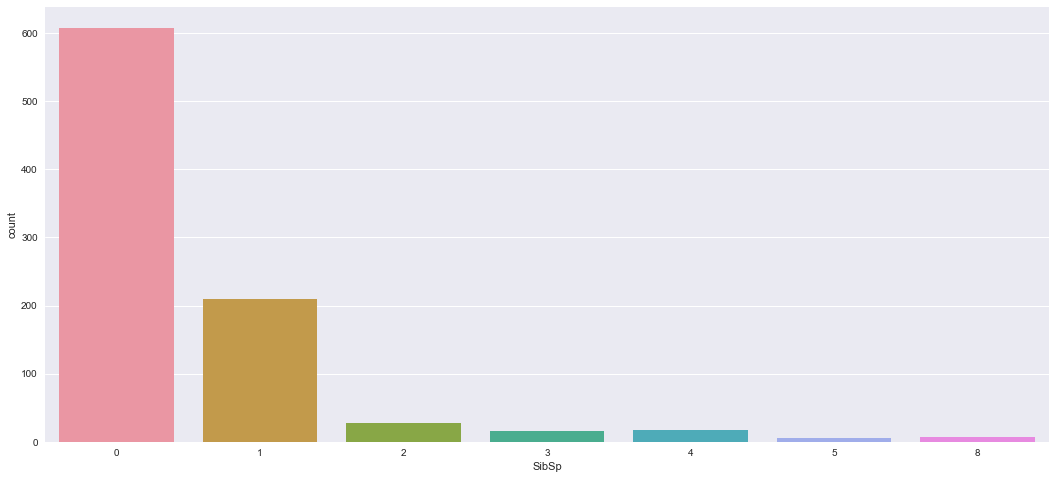

In [13]:
figure, ax = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 8)

sns.countplot(data=train, x="SibSp", ax=ax)

In [14]:
def find_title(name):
    return name.split(", ")[1].split(". ")[0]

train["Title"] = train["Name"].apply(find_title)

print(train.shape)
train[["Name", "Title"]].head()

(891, 12)


,Name,Title
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Heikkinen, Miss. Laina",Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
5,"Allen, Mr. William Henry",Mr


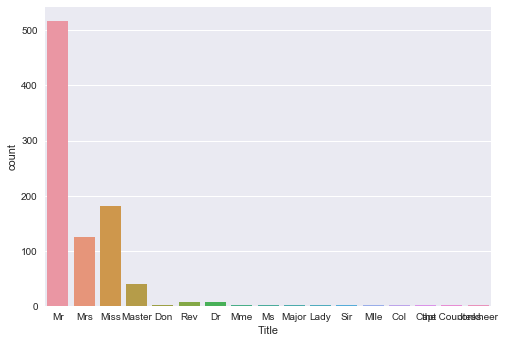

In [15]:
# x축의 label이 겹쳐 보인다. (ex: Capt, The ountess, Jonkheer)
sns.countplot(data=train, x="Title")

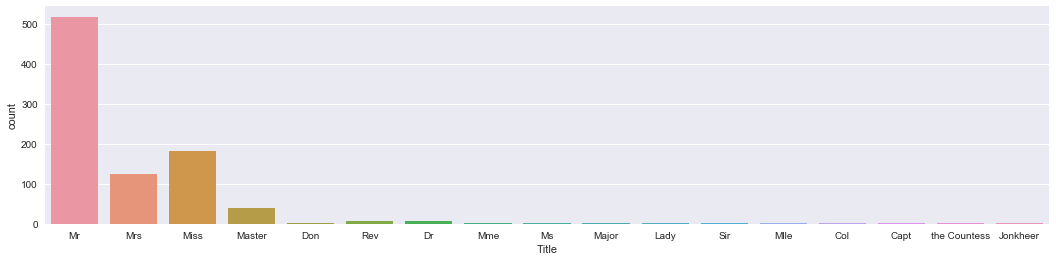

In [16]:
figure, ax = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.countplot(data=train, x="Title", ax=ax)

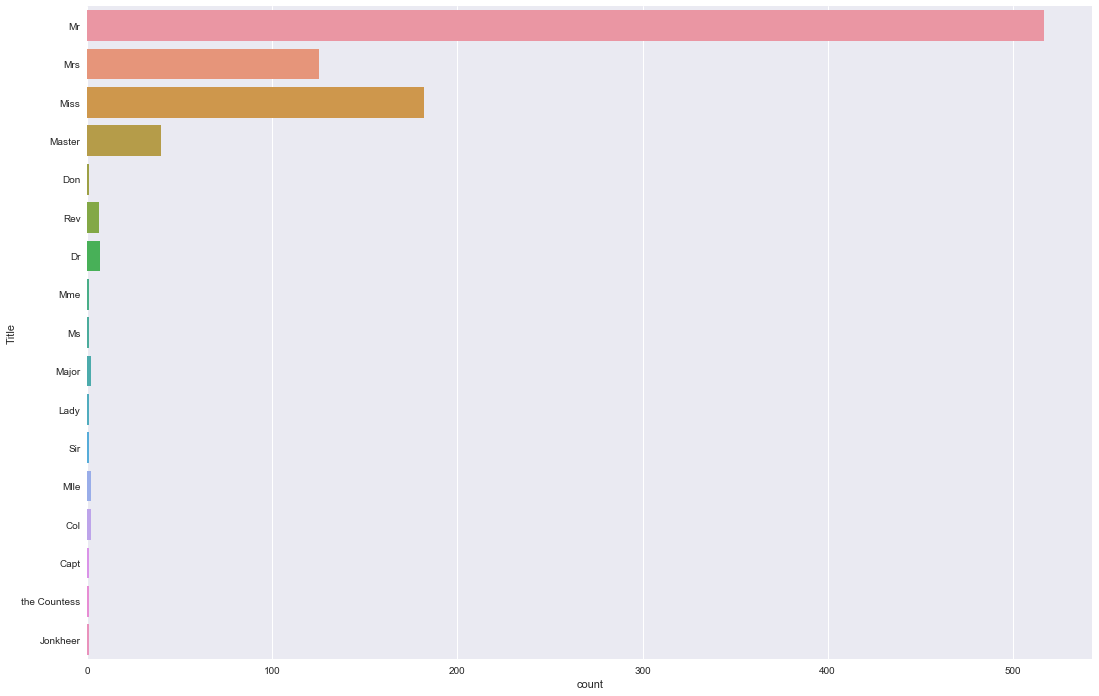

In [17]:
figure, ax = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 12)

sns.countplot(data=train, y="Title", ax=ax)

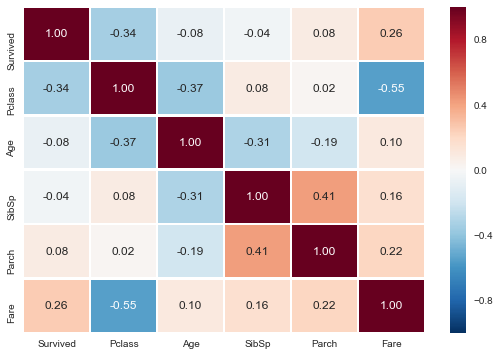

In [33]:
corr = train.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()